<a href="https://colab.research.google.com/github/MIRYALASAITEJA/23CSBTB30/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv("/content/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/diabetes.csv")

# Check the actual column names in the DataFrame
print(df.columns)

# Assuming the target column is named 'Outcome'
# (replace with the actual name if different)
scaler = StandardScaler()

scaler.fit(df.drop('Outcome', axis=1)) # Changed 'Target' to 'Outcome'
scaled_features = scaler.transform(df.drop('Outcome',axis=1)) # Changed 'Target' to 'Outcome'

df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns.drop('Outcome')) # Changed to drop 'Outcome' from columns
df_feat.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Change 'Taregt' to 'Outcome' in the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Outcome'], test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not. We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model!
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[125  31]
 [ 29  46]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       156
           1       0.60      0.61      0.61        75

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



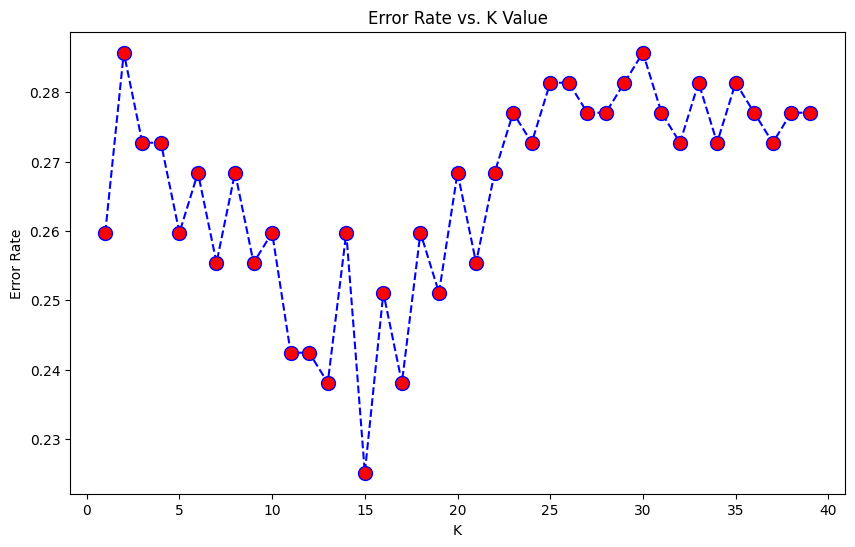

In [15]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [16]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 1
Confusion Matrix
[[125  31]
 [ 29  46]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       156
           1       0.60      0.61      0.61        75

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [17]:
# NOW WITH K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 10
Confusion Matrix
[[140  16]
 [ 44  31]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       156
           1       0.66      0.41      0.51        75

    accuracy                           0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231

